<a href="https://colab.research.google.com/github/mochradja/DataScience/blob/main/data_Ads.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('sample_data/ads.csv')
data

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [ ]:
data.isna().sum()

TV              10
Radio            4
Social Media     6
Influencer       0
Sales            6
dtype: int64

In [ ]:
data = data[data.notnull()]

# Clean data TV

In [ ]:
data['TV'].isna().value_counts()
not_nan = data['TV'].isnull() == False
data['TV'].loc[not_nan]

tv = data['TV'].loc[data['TV'].isnull() == False]
tv_mean = tv.mean()

data['TV'] = data['TV'].fillna(tv_mean)
data['TV'].head()

0    16.0
1    13.0
2    41.0
3    83.0
4    15.0
Name: TV, dtype: float64

In [ ]:
data['TV'].isnull().value_counts()

False    4572
Name: TV, dtype: int64

# Clean data radio

In [ ]:
data['Radio'].isna().value_counts()
not_nan = data['Radio'].isnull() == False
data['Radio'].loc[not_nan]

radio = data['Radio'].loc[data['Radio'].isnull() == False]
radio_mean = radio.mean()

data['Radio'] = data['Radio'].fillna(radio_mean)
data['Radio'].head()

0     6.566231
1     9.237765
2    15.886446
3    30.020028
4     8.437408
Name: Radio, dtype: float64

In [ ]:
data['TV'].isnull().value_counts()

False    4572
Name: TV, dtype: int64

# Clean social media

In [ ]:
data['Social Media'].isna().value_counts()
not_nan = data['Social Media'].isnull() == False
data['Social Media'].loc[not_nan]

social = data['Social Media'].loc[data['Social Media'].isnull() == False]
social_mean = social.mean()

data['Social Media'] = data['Social Media'].fillna(social_mean)
data['Social Media'].head()

0    2.907983
1    2.409567
2    2.913410
3    6.922304
4    1.405998
Name: Social Media, dtype: float64

In [ ]:
data['Social Media'].isnull().value_counts()

False    4572
Name: Social Media, dtype: int64

# Clean Sales

In [ ]:
data['Sales'].isna().value_counts()
not_nan = data['Sales'].isnull() == False
data['Sales'].loc[not_nan]

sales = data['Sales'].loc[data['Sales'].isnull() == False]
sales_mean = sales.mean()

data['Sales'] = data['Sales'].fillna(sales_mean)
data['Sales'].head()

0     54.732757
1     46.677897
2    150.177829
3    298.246340
4     56.594181
Name: Sales, dtype: float64

In [ ]:
data['Sales'].isnull().value_counts()

False    4572
Name: Sales, dtype: int64

# Memeriksa kolerasi 

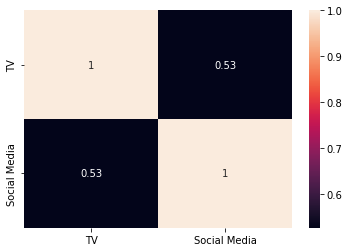

In [ ]:
sns.heatmap(data[['TV', 'Social Media']].corr(), annot=True)

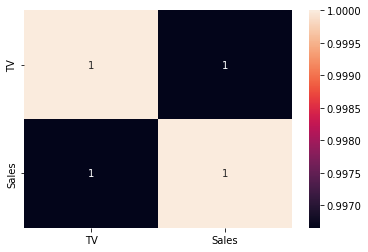

In [ ]:
sns.heatmap(data[['TV', 'Sales']].corr(), annot=True)

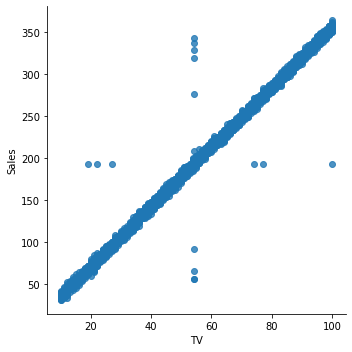

In [ ]:
sns.lmplot(x='TV', y='Sales', data=data)

# Proses melatih dan membuat model

In [ ]:
x = data[['TV']]
y = data[['Sales']]

# Proses membandingkan dengan 70 : 30

In [ ]:
# Training data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=10)

In [ ]:
# Membuat model

from sklearn.linear_model import LinearRegression

data = LinearRegression()
data.fit(x_train, y_train)

LinearRegression()

# Uji coba disini

In [ ]:
data.intercept_, data.coef_

(array([0.1976656]), array([[3.55394622]]))

In [ ]:
x = 83.6
y = 0.1976656 + 3.55394622 * x
print(y)

297.30756959199994


Text(0.5, 1.0, 'Plot TV dan Sales')

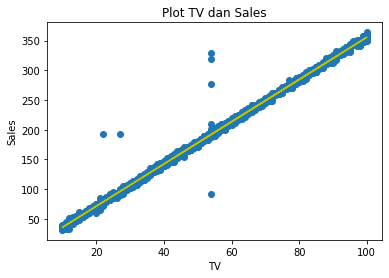

In [ ]:
y_pred = data.predict(x_test)
plt.scatter(x_test, y_test)
plt.plot(x_test, y_pred, c='y')
plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Plot TV dan Sales')

# Evaluasi model

In [ ]:
data.score(x_test, y_test)

0.992700895453413

# Prediksi aktual dan

In [ ]:
y_predict = data.predict(x_test)

evaluasi = pd.DataFrame({
    'TV': y_test.values.flatten(),
    'Sales' : y_predict.flatten()
    })

evaluasi

,TV,Sales
0,324.160944,323.606772
1,91.497529,99.708160
2,56.110375,57.060805
3,119.967546,121.031837
4,261.620188,256.081794
...,...,...
1367,53.557997,57.060805
1368,263.020687,266.743632
1369,260.062857,259.635740
1370,339.190205,334.268611


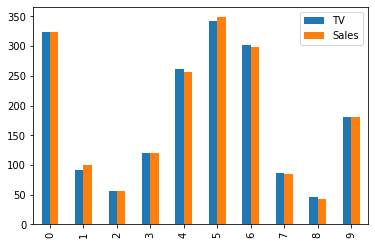

In [ ]:
evaluasi.head(10).plot(kind='bar')

In [ ]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error (y_test, y_predict))

63.08370066492155
